# **Image smoothing (or blurring)**

is a foundational technique in image processing primarily used to remove noise. Here’s an overview of the different filters commonly used, each serving a specific purpose in noise reduction or edge detection.

# **Low Pass Filters (LPS)**

**Purpose:** Primarily used to smooth or blur an image, which helps in noise reduction.
    
**Functionality:** LPS averages pixel values in a region, which reduces high-frequency components (sharp details or noise).

**Types of Low Pass Filters:**
        
Homogeneous Filter (or Mean Filter): Replaces each pixel with the average of its neighboring pixels.

Blur (Averaging): Averages pixel values within a kernel,replacing each pixel with this average for basic smoothing.
        
Gaussian Filter: Uses a weighted average where central pixels have more influence, resulting in a natural blur.
        
Median Filter: Replaces each pixel with the median of its neighboring pixels, effective for "salt-and-pepper" noise.

Bilateral Filter: Maintains edges while blurring non-edge areas, effective for smoothing without losing edge information.

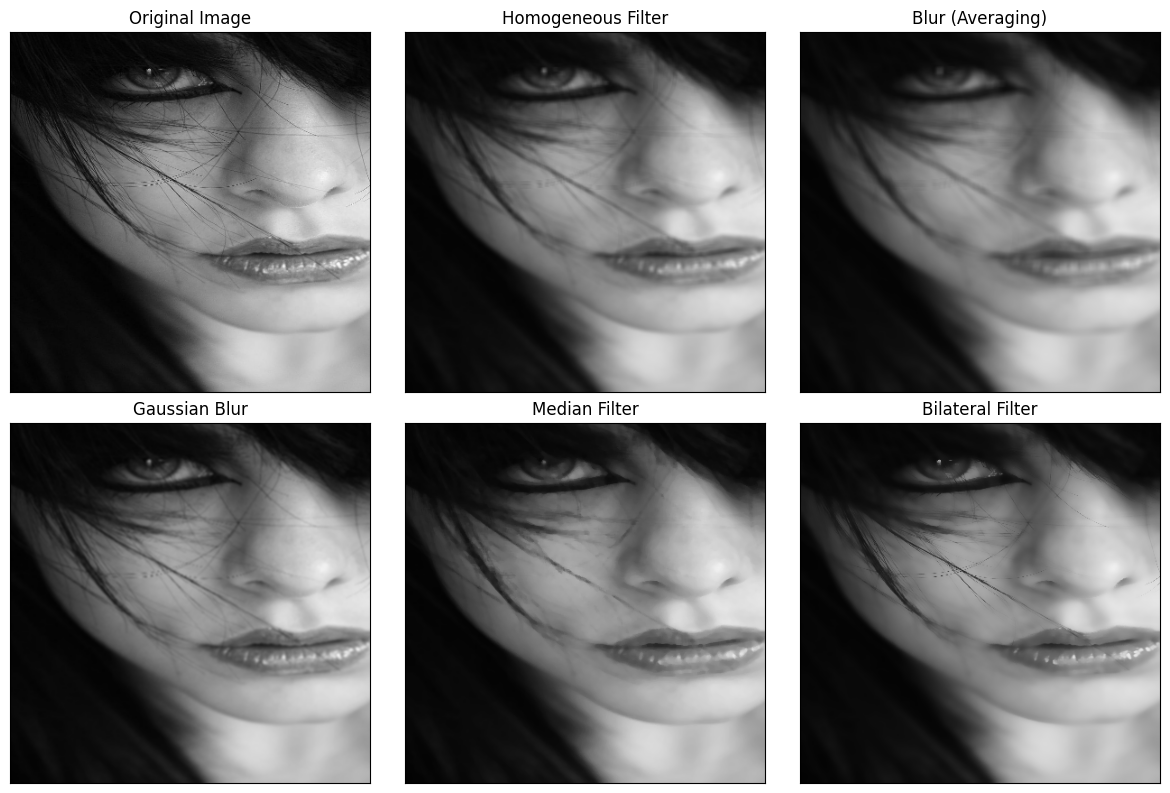

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
#uploaded = files.upload()

# Load the image in color
img = cv2.imread("/content/eye3.jpg")  # Replace "noisy.jpg" with the uploaded file name
img = cv2.resize(img, (400, 400))

# Define a kernel for the homogeneous filter
kernel = np.ones((5, 5), np.float32) / 25


#FILTER NUMBER -----1
#this filter  work like, each output pixel is the mean of its kernal neigbours
#it is aka homogeneous filter in this all pixel contribute with equal weight.
#kernal is a small shape or matrix which we apply on image.
#in this filter kernal is [(1/kernal(h,w))*kernal]
# Filter 1: Homogeneous filter
h_filter = cv2.filter2D(img, -1, kernel)

#FILtER NUMBER 2-----
#blur method or averaging
#takes the avg of all the pixels under kernel area and
#replaces the central element with this average..
# Filter 2: Blur (Averaging)
blur = cv2.blur(img, (8, 8))

#Filter Number 3------
#Gaussian Filter -here it using different weight kernel,in  row as well as col.
#means side values are small then centre .It manage distance b/w value of pixel.
# Filter 3: Gaussian Blur
gau = cv2.GaussianBlur(img, (5, 5), 0)


#Filter Number 4--
#Median Filter --computes the median of all the pixels under the
#kernel window and the central pixel is replaced with this median value.
# This is highly effective in removing salt-and-pepper noise.
#here kernal size must be odd except one
# Filter 4: Median Filter
med = cv2.medianBlur(img, 5)

#bilateral filter --- is highly effective at noise removal while preserving edges.
#It work like gaussian filter but more focus on edges
#it is slow as compare with other filters
#argument (img, neigbour_pixel_diameter,sigma_color,sigma_space)
# Filter 5: Bilateral Filter
bi_f = cv2.bilateralFilter(img, 9, 75, 75)

# Titles and images for display
titles = ["Original Image", "Homogeneous Filter", "Blur (Averaging)", "Gaussian Blur", "Median Filter", "Bilateral Filter"]
images = [img, h_filter, blur, gau, med, bi_f]

# Display all images in a grid using matplotlib
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# **High Pass Filters (HPF)**

**Sobel Filter:** Detects edges by calculating intensity gradients in the horizontal and vertical directions.
   
**Laplacian Filter**:Detects edges by calculating the second derivative of pixel intensities.
    
**Canny Edge Detector:** Detects strong edges using gradient calculation, non-maximum suppression, and edge tracing.

# **Image Gradient**

**Definition**: An image gradient represents the directional change in color or intensity within an image.

**Importance**: Gradients are crucial for identifying edges, shapes, and textures within images, as edges are often where intensity changes are significant.

**Applications**: Used in edge detection, object recognition, and various image processing tasks to extract detailed information.

# **Methods to Find Image Gradients**

**Laplacian Derivative:**
        
Description: The Laplacian is a second-order derivative that calculates the rate of change in intensity.
        
Method: Computes the second derivative in both horizontal and vertical directions, detecting edges regardless of orientation.
        
Use: Effective in finding regions of rapid intensity change, making it ideal for edge detection.

# **SobelX and SobelY:**
       
Description: Sobel operators (SobelX for horizontal, SobelY for vertical) calculate the first derivative in a specific direction.
        
SobelX: Detects edges in the vertical direction by emphasizing horizontal intensity changes.
        
SobelY: Detects edges in the horizontal direction by emphasizing vertical intensity changes.
        
Method: Uses a convolution kernel to calculate intensity gradients, which highlight edges.
        
Use: Combined, SobelX and SobelY provide edge detection in both horizontal and vertical directions, useful for identifying object boundaries and textures.



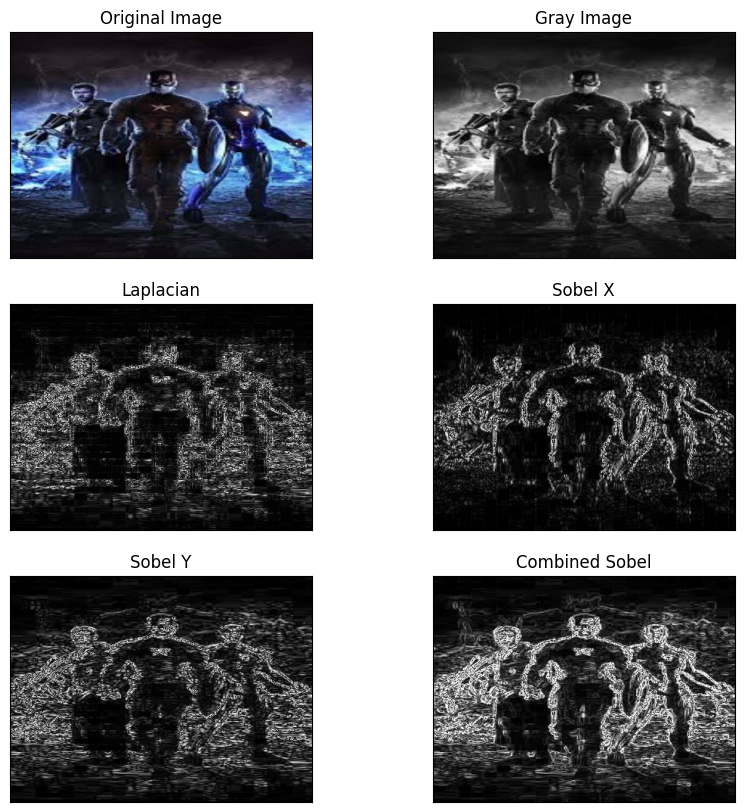

In [ ]:
# Image Gradient--
# Gradient is the directional change in color or intensity in an image.
# It’s essential for extracting information, like detecting edges.

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in grayscale
img = cv2.imread("/ave.jpeg")
img = cv2.resize(img, (400, 300))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Laplacian Derivative (Edge detection based on intensity change)
lap = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))

# Sobel Operations (for x and y gradients, resistant to noise)
sobelX = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)  # Vertical edges
sobelY = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)  # Horizontal edges
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# Combine SobelX and SobelY
sobelcombine = cv2.bitwise_or(sobelX, sobelY)

# Plot all images using matplotlib
titles = ["Original Image", "Gray Image", "Laplacian", "Sobel X", "Sobel Y", "Combined Sobel"]
images = [img, img_gray, lap, sobelX, sobelY, sobelcombine]

plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


## **Canny Edge Detection** is an edge detection technique used in image processing to identify the boundaries of objects within an image. Developed by John F. Canny in 1986, it uses a multi-step process to detect edges while minimizing noise and false detections.

**Canny Edge Detection process, detailing each of its five stages:**

Noise Reduction: Smooth the image using a Gaussian filter to reduce noise, minimizing false edges.

Gradient Calculation: Calculate intensity gradients in x and y directions to detect edge strength and orientation.

Non-Maximum Suppression: Retain only pixels with maximum gradient value along the edge direction to thin edges.

Double Thresholding: Apply two thresholds to classify pixels as strong, weak, or non-edges based on intensity.

Edge Tracking by Hysteresis: Preserve weak edges connected to strong edges, discarding isolated weak edges for a clean result.



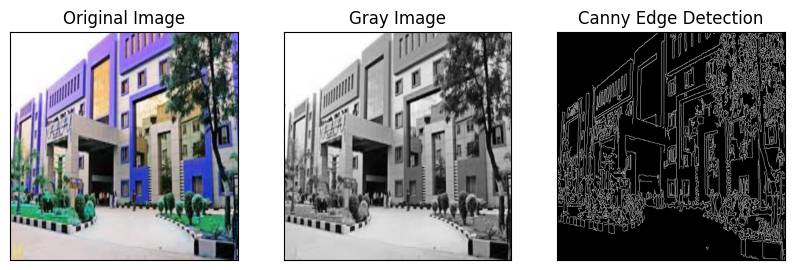

In [18]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt


#Canny Edge Detection using OpenCV
#Canny Edge Detection is a popular edge detection approach.
#It is use  multi-stage algorithm to detect a edges.
#It was developed by John F. Canny in 1986.
#This approach combine with 5 steps.
# 1) -  NOise reduction(gauss)), 2) -Gradient calculation( ,
# 3) - Non-maximum suppresson, 4) - Double Threshold,
# 5) - Edge Tracking by Hysteresis


# Load image and convert to grayscale
img = cv2.imread("/content/mlritm.jpeg")
img = cv2.resize(img, (600, 600))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection with specified thresholds
#canny(img,thresh1,thres2)thresh 1 and thresh2 at different lvl
canny = cv2.Canny(img_gray,20,150)
canny = cv2.Canny(img_gray, 20, 150)

# Display images using matplotlib
titles = ["Original Image", "Gray Image", "Canny Edge Detection"]
images = [img, img_gray, canny]

plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray' if i > 0 else None)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


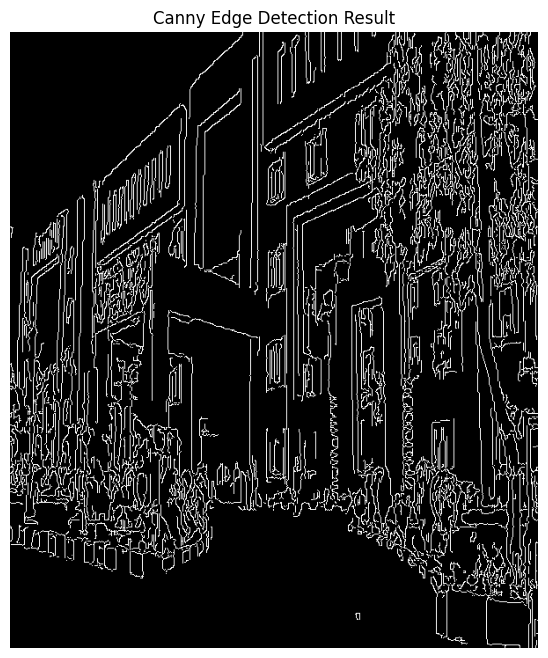

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread("/content/mlritm.jpeg")
img = cv2.resize(img, (600, 700))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Manually set the threshold values instead of using trackbars
lower_threshold = 50  # Adjust this value as needed
upper_threshold = 150  # Adjust this value as needed

# Apply Canny edge detection with these thresholds
res = cv2.Canny(img_gray, lower_threshold, upper_threshold)

# Display the result using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(res, cmap='gray')
plt.title("Canny Edge Detection Result")
plt.axis("off")
plt.show()


# **NOTE:**if you have any doubts for edge detection what technique we can choose then we can you trackbars to fine better edge.